## Import seabprn and fetch dataset "mpg"

In [26]:
import seaborn as sns

df = sns.load_dataset("mpg")
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## EDA Explorattory Data Analysis

In [3]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [13]:
df[["cylinders", "horsepower", "weight"]].describe()

,cylinders,horsepower,weight
count,398.000000,392.000000,398.000000
mean,5.454774,104.469388,2970.424623
std,1.701004,38.491160,846.841774
min,3.000000,46.000000,1613.000000
25%,4.000000,75.000000,2223.750000
50%,4.000000,93.500000,2803.500000
75%,8.000000,126.000000,3608.000000
max,8.000000,230.000000,5140.000000


In [23]:
X, y = df.drop(["mpg", "displacement", "acceleration", "model_year", "name", "origin"], axis=1), df["mpg"]
X, y

(     cylinders  horsepower  weight
 0            8       130.0    3504
 1            8       165.0    3693
 2            8       150.0    3436
 3            8       150.0    3433
 4            8       140.0    3449
 ..         ...         ...     ...
 393          4        86.0    2790
 394          4        52.0    2130
 395          4        84.0    2295
 396          4        79.0    2625
 397          4        82.0    2720
 
 [398 rows x 3 columns],
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 393    27.0
 394    44.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 398, dtype: float64)

In [27]:
X.head()

,cylinders,horsepower,weight
0,8,130.0,3504
1,8,165.0,3693
2,8,150.0,3436
3,8,150.0,3433
4,8,140.0,3449


In [28]:
y.head()


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

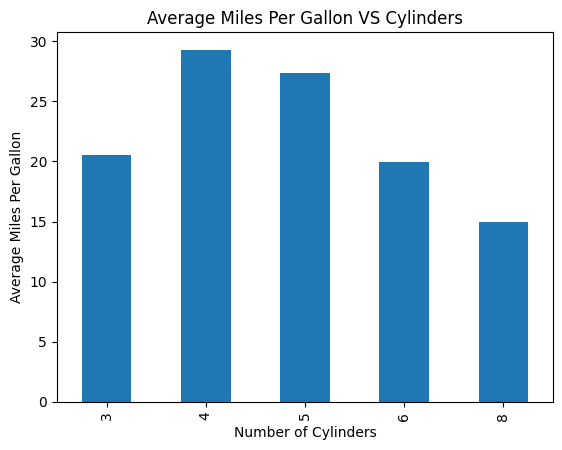

In [40]:
import matplotlib.pyplot as plt
mpg_mean_cylinders = df.groupby("cylinders")["mpg"].mean()

mpg_mean_cylinders.plot(kind="bar")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average Miles Per Gallon")
plt.title("Average Miles Per Gallon VS Cylinders")
plt.show()

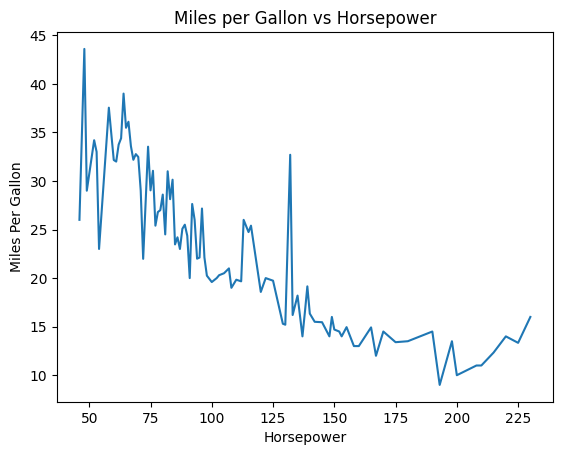

In [43]:
mpg_mean_horsepower = df.groupby("horsepower")["mpg"].mean()

mpg_mean_horsepower.plot(kind="line")

plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon")
plt.title("Miles per Gallon vs Horsepower")
plt.show()

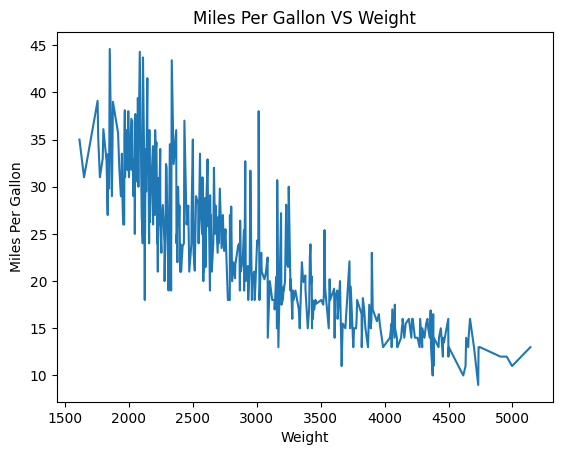

In [50]:
mpg_mean_weight = df.groupby("weight")["mpg"].mean()

mpg_mean_weight.plot(kind="line")

plt.title("Miles Per Gallon VS Weight")
plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon")
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)





In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 3), (80, 3), (318,), (80,))

In [ ]:
def predictor(X_train, X_test, y_train, y_test):
    # 1) Skala features
    scaler = MinMaxScaler().fit(X_train)        
    X_train_scaled = scaler.transform(X_train)       
    X_test_scaled  = scaler.transform(X_test)        

    # 2) Träna linjär regression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # 3) Prediktioner och metrics
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    
    return model, scaler, y_pred, mae, mse, rmse
